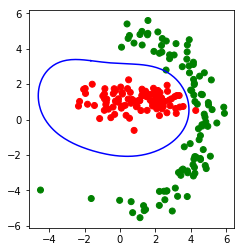

In [2]:
# Kernel Support Vector Machine

from scipy.optimize import minimize
import numpy as np
import random
from math import sin, cos
import matplotlib.pyplot as plt
from skimage import measure

from sklearn.svm import SVC

plt.axes(aspect="equal")

m1 = 100
class1 = [ np.array([
    random.normalvariate(1., 1.5), random.normalvariate(1., 0.5)
]) for i in range(m1) ]

m2 = m1
angle1 = -np.pi*2/3
angle2 = np.pi*2/3
ex = np.array([1., 0.]); ey = np.array([0., 1.])
class2 = []
for i in range(m2):
    phi = random.normalvariate(0., 1.)
    r = random.normalvariate(5., 0.5)
    p = ex*cos(phi)*r + ey*sin(phi)*r
    class2.append(p.copy())
    
x = class1 + class2
x = np.array(x)
y = [1.]*len(class1) + [-1.]*len(class2)
y = np.array(y)
m = len(x)
perm = np.random.permutation(m)
x = x[perm]
y = y[perm]

plt.scatter(
    [c[0] for c in x], [c[1] for c in x],
    color=[ "r" if yy > 0. else "g" for yy in y ]
)

degree = 3
C = 2.    # Hyperparameter

# classifier = SVC(C=C, kernel="poly", degree=degree)
classifier = SVC(C=C, kernel="rbf")
classifier.fit(x, y)

def classifierValue(x):
    xx = np.array([  [x[0], x[1]]  ])
    # return classifier.predict(xx)
    return classifier.decision_function(xx)

# Draw the separating line
xmin = min([xx[0] for xx in x]) - 1.
xmax = max([xx[0] for xx in x]) + 1.
ymin = min([xx[1] for xx in x]) - 1.
ymax = max([xx[1] for xx in x]) + 1.
steps = 100

def xcoord(j):
    dx = (xmax - xmin)/steps
    return xmin + j*dx
def ycoord(i):
    dy = (ymax - ymin)/steps
    return ymin + i*dy

# a is a matrix of dimension (steps, steps)
a = np.array([[0.]*steps for iy in range(steps)])
for i in range(steps):
    for j in range(steps):
        xx = np.array([xcoord(j), ycoord(i)])
        a[i, j] = classifierValue(xx)
nullContours = measure.find_contours(a, 0.)
for c in nullContours:
    plt.plot(
        [xcoord(cc[1]) for cc in c], 
        [ycoord(cc[0]) for cc in c],
        color="blue"
    )

# Uncomment the following line for a standalone application
# plt.show()